In [16]:
import numpy as np
import math

In [17]:
total_points = 1000
num_parts = 4

points_per_part = total_points // num_parts

x_values = []
y_values = []

for i in range(num_parts):
    
    start = -2 * np.pi + i * (4 * np.pi / num_parts)
    end = -2 * np.pi + (i + 1) * (4 * np.pi / num_parts)
    
    x_part = np.linspace(start, end, points_per_part)
    y_part = np.sin(x_part)
    
    x_values.extend(x_part)
    y_values.extend(y_part)
    
x_train = np.array(x_values)
y_train = np.array(y_values)

In [18]:
x_train_2d = x_train.reshape(-1, 1)

In [19]:
x_train_2d

array([[-6.28318531],
       [-6.27056847],
       [-6.25795163],
       [-6.24533479],
       [-6.23271796],
       [-6.22010112],
       [-6.20748428],
       [-6.19486744],
       [-6.1822506 ],
       [-6.16963377],
       [-6.15701693],
       [-6.14440009],
       [-6.13178325],
       [-6.11916641],
       [-6.10654958],
       [-6.09393274],
       [-6.0813159 ],
       [-6.06869906],
       [-6.05608222],
       [-6.04346539],
       [-6.03084855],
       [-6.01823171],
       [-6.00561487],
       [-5.99299803],
       [-5.9803812 ],
       [-5.96776436],
       [-5.95514752],
       [-5.94253068],
       [-5.92991384],
       [-5.91729701],
       [-5.90468017],
       [-5.89206333],
       [-5.87944649],
       [-5.86682965],
       [-5.85421282],
       [-5.84159598],
       [-5.82897914],
       [-5.8163623 ],
       [-5.80374546],
       [-5.79112863],
       [-5.77851179],
       [-5.76589495],
       [-5.75327811],
       [-5.74066127],
       [-5.72804444],
       [-5

In [20]:
def activate(x):
    return 1 / (1 + math.exp(-x))
phi = np.vectorize(activate)

In [21]:
l = []
hiddenweight = np.random.uniform(-1, 1, size=(1, 100))
bias = np.random.uniform(-1, 1, size=(1, 100))

for i in range(len(x_train_2d)):
    
    a = np.add(np.matmul(x_train_2d[i], hiddenweight), bias)
    l.append(a)

lf = []
for i in range(len(l)):
    lf.append(l[i][0])
#print(lf)
result = phi(lf)
result = np.linalg.pinv(result)
beta = np.matmul(result, y_train)
#print(result)
#print(beta)

In [23]:
num_points = 300
x_min = -2 * np.pi
x_max = 2 * np.pi


x_validation = np.random.uniform(x_min, x_max, size=num_points)
x_validation = np.array(x_validation)
x_validation_2d = x_validation.reshape(-1,1)
# print(x_validation_2d)

In [24]:
l = []

for i in range(len(x_validation_2d)): 
    a = np.add(np.matmul(x_validation_2d[i], hiddenweight), bias)
    l.append(a)

lf = []
for i in range(len(l)):
    lf.append(l[i][0])
    
result = phi(lf)
tes = np.matmul(result,beta)
# print(tes)

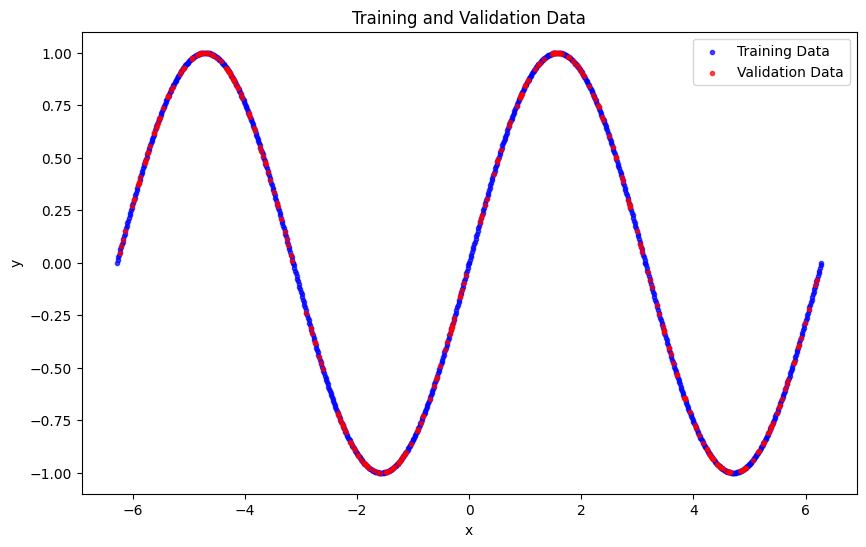

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # Optional: Set the figure size

# Plot training data as blue circles
plt.scatter(x_train, y_train, label='Training Data', color='blue', marker='.', alpha=0.7)
plt.scatter(x_validation, tes, label='Validation Data', color='red', marker='.', alpha=0.7)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Training and Validation Data')
plt.legend()
# plt.grid(True)

plt.show()